In [676]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [893]:
train = pd.read_csv('titanic_train.csv')

## Analisando os dados

In [894]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [895]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


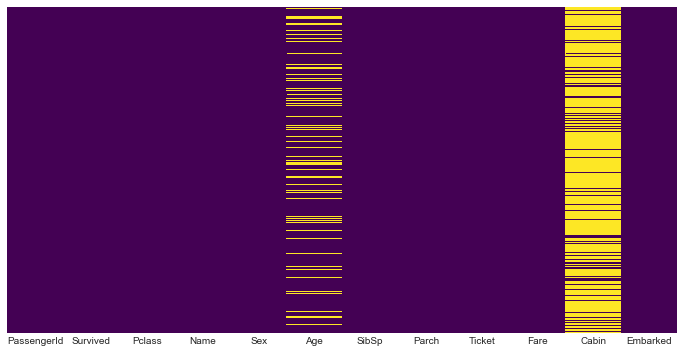

In [896]:
plt.figure(figsize = (12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') #mostrando a localização dos NaN

In [897]:
sns.set_style('whitegrid')

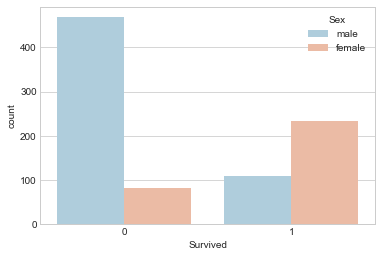

In [898]:
sns.countplot(x = 'Survived',data = train,hue = 'Sex',palette = 'RdBu_r')

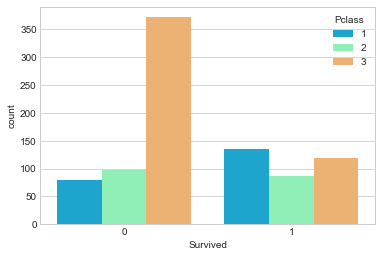

In [899]:
sns.countplot(x = 'Survived',data = train,hue = 'Pclass',palette = 'rainbow')

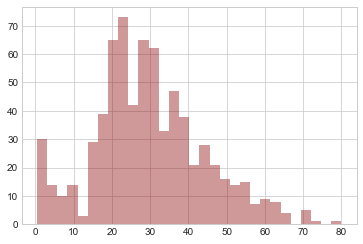

In [900]:
train['Age'].hist(bins = 30,color = 'darkred',alpha = 0.4)

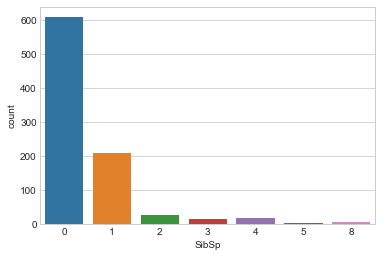

In [901]:
sns.countplot(x = 'SibSp',data = train)

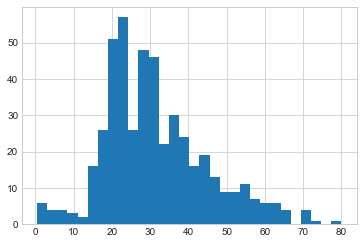

In [902]:
train[train['SibSp'] == 0]['Age'].hist(bins = 30)

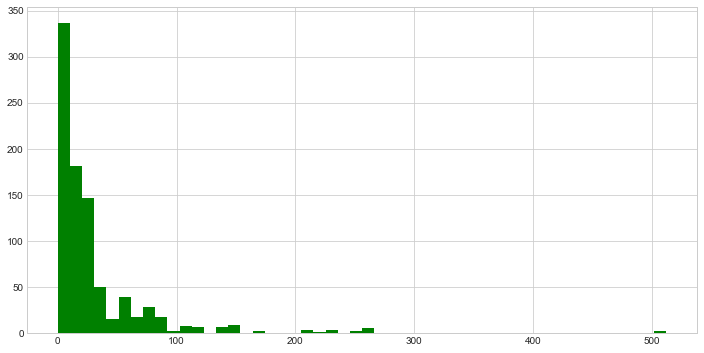

In [903]:
train['Fare'].hist(color = 'green',bins = 50, figsize = (12,6))

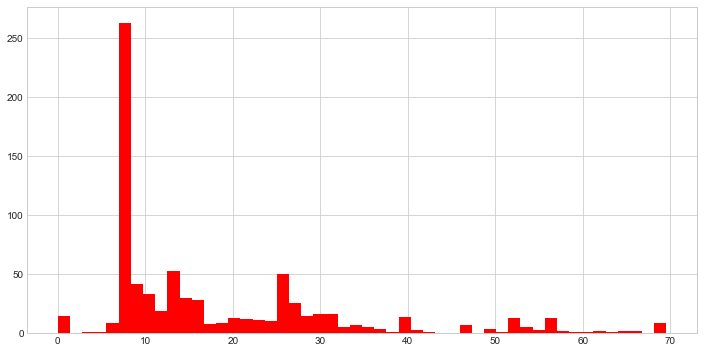

In [904]:
train[train['Fare']<70]['Fare'].hist(color = 'red',bins = 50, figsize = (12,6)) #visualizar melhor quem pagou menos do que 70

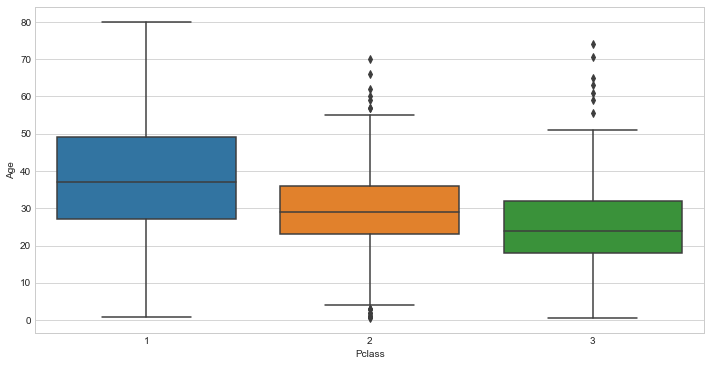

In [905]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Pclass',y = 'Age', data = train)

## Tratando os Dados

In [906]:
def inputar_idade(cols):
    Idade = cols[0]
    Class = cols[1]
    
    if pd.isnull(Idade):
        if Class ==1:
            return 37
        elif Class == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [907]:
train['Age'] = train[['Age','Pclass']].apply(inputar_idade,axis = 1)

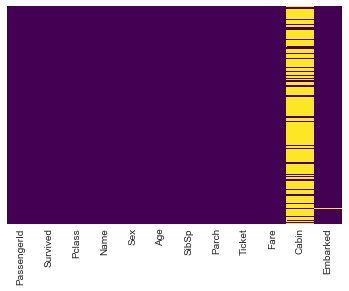

In [908]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') #mostrando a localização dos NaN

In [909]:
del train['Cabin']
# train.drop('Cabin',inplace = True)

In [910]:
train.dropna(inplace = True)
#Um Embarked estava* NaN ai pra tratar, como era apenas um, retirava a linha dele

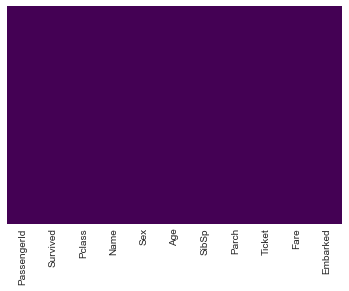

In [911]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') #mostrando a localização dos NaN

In [912]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
#Tratando a col Sex, string para um binario (M[1])/F[0]

In [913]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#Tratando a col Sex, string para um binario C[0][0],S[1][0],Q[0][1]

In [914]:
train.drop(['Sex','PassengerId','Name','Ticket','Embarked'],axis = 1, inplace=True)

In [915]:
train = pd.concat([train, sex, embark],axis = 1)

## Modelo

In [916]:
from sklearn.linear_model import LogisticRegression

In [917]:
from sklearn.model_selection import train_test_split

In [918]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'],test_size=0.3)

In [919]:
logmodel = LogisticRegression()

In [920]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Teste

In [921]:
predctions = logmodel.predict(X_test)

In [922]:
from sklearn.metrics import classification_report

In [923]:
print(classification_report(y_test,predctions))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       168
          1       0.78      0.74      0.76        99

avg / total       0.83      0.83      0.83       267



In [924]:
from sklearn.metrics import confusion_matrix

In [925]:
print(confusion_matrix(y_test,predctions))

[[148  20]
 [ 26  73]]
